In [3]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..','..')))
from src.TotalCalculation import *
from src.preprocessing import *
import os
from datetime import datetime as dt
from src.ConstructDataset import Builddataset
from IPython.display import display, HTML

In [4]:
filename = image.getFilename(path=r'C:\Users\ASUS\Documents\NARIT_internship_data\All_sky_camera_Astropark_Chaingmai\2023-12\2023-12-21')
img = [cv2.cvtColor(cv2.imread(f),cv2.COLOR_BGR2RGB) for f in filename]
print(filename)

['C:\\Users\\ASUS\\Documents\\NARIT_internship_data\\All_sky_camera_Astropark_Chaingmai\\2023-12\\2023-12-21\\638386884168717674.png', 'C:\\Users\\ASUS\\Documents\\NARIT_internship_data\\All_sky_camera_Astropark_Chaingmai\\2023-12\\2023-12-21\\638386886768748688.png', 'C:\\Users\\ASUS\\Documents\\NARIT_internship_data\\All_sky_camera_Astropark_Chaingmai\\2023-12\\2023-12-21\\638386889368846339.png', 'C:\\Users\\ASUS\\Documents\\NARIT_internship_data\\All_sky_camera_Astropark_Chaingmai\\2023-12\\2023-12-21\\638386891973816919.png', 'C:\\Users\\ASUS\\Documents\\NARIT_internship_data\\All_sky_camera_Astropark_Chaingmai\\2023-12\\2023-12-21\\638386894573721906.png', 'C:\\Users\\ASUS\\Documents\\NARIT_internship_data\\All_sky_camera_Astropark_Chaingmai\\2023-12\\2023-12-21\\638386897173691995.png', 'C:\\Users\\ASUS\\Documents\\NARIT_internship_data\\All_sky_camera_Astropark_Chaingmai\\2023-12\\2023-12-21\\638386899773848026.png', 'C:\\Users\\ASUS\\Documents\\NARIT_internship_data\\All_sky_c

In [5]:
filetime = []
extract_name = lambda x : int(os.path.splitext(os.path.basename(x))[0])
filetime = [extract_name(i) for i in filename]
decimal = [timeConvertion().datetime_to_decimal(time=timeConvertion().ticks_to_datetime(ticks=t,time_zone=7)) for t in filetime]
print(decimal)

[0.0044444444444444444, 0.07666666666666666, 0.14888888888888888, 0.22138888888888889, 0.2936111111111111, 0.3658333333333333, 0.4380555555555556, 0.5102777777777778, 0.5852777777777778, 0.6575, 0.73, 0.8022222222222223, 0.8744444444444445, 0.9466666666666667, 1.0188888888888887, 1.0911111111111111, 1.1633333333333333, 1.2355555555555555, 1.3105555555555557, 1.3830555555555555, 1.4552777777777777, 1.5274999999999999, 1.5997222222222223, 1.6719444444444442, 1.7441666666666666, 1.8163888888888888, 1.8888888888888888, 1.961111111111111, 2.036111111111111, 2.1083333333333334, 2.1805555555555554, 2.2527777777777778, 2.3249999999999997, 2.3975, 2.4697222222222224, 2.5419444444444443, 2.6141666666666667, 2.686388888888889, 2.761388888888889, 2.8336111111111113, 2.9058333333333333, 2.9783333333333335, 3.0505555555555555, 3.122777777777778, 3.195, 3.2672222222222222, 3.3394444444444447, 3.4116666666666666, 3.486666666666667, 3.5588888888888888, 3.631388888888889, 3.7036111111111114, 3.775833333

In [6]:
decimal = []
for i in filetime:    
    t = timeConvertion().ticks_to_datetime(ticks=i,time_zone=7)
    decimal.append(timeConvertion().datetime_to_decimal(time=t))

In [7]:
start_date = str(dt(t.year,1,1).date())
sunrise,sunset = SunPosition().SunriseSunset(location=[18.849417,98.9538],Time_zone=7,filename=filetime[7],start_date=start_date,include_end_date=True)
print(sunrise,sunset)

6.947767863969808 17.812304489132117


In [8]:
filtering = lambda x : (x > sunrise) & (x < sunset)
day_indices = [index for index, value in enumerate(decimal) if filtering(value)]
night_indices = [index for index, value in enumerate(decimal) if not filtering(value)]

In [9]:
Day_filename = [filename[i] for i in day_indices]
night_filename = [filename[i] for i in night_indices]

In [10]:
Day_filename,night_filename = image.extract_filename(filename=filename,sunrise=sunrise,sunset=sunset,time_zone=7)

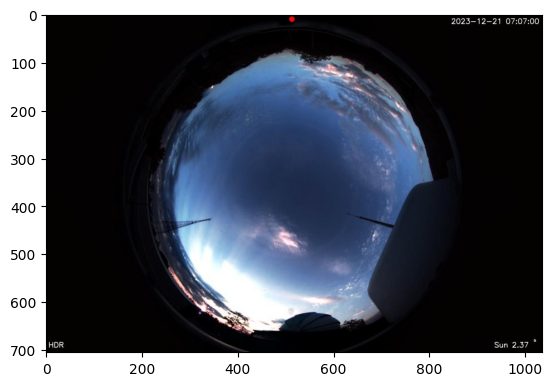

In [11]:
import cv2
from matplotlib import pyplot as plt
im = 3
images = []
images = [cv2.imread(i) for i in Day_filename]
images = [cv2.cvtColor(i,cv2.COLOR_BGR2RGB) for i in images]
plt.imshow(images[im])

In [12]:
crop_image = [preprocessData().crop_center(img=i,crop_size=570) for i in images]
Blue = [cv2.split(i)[2] for i in crop_image]
skewness = [preprocessData().calculate_skewness(data=B) for B in Blue]

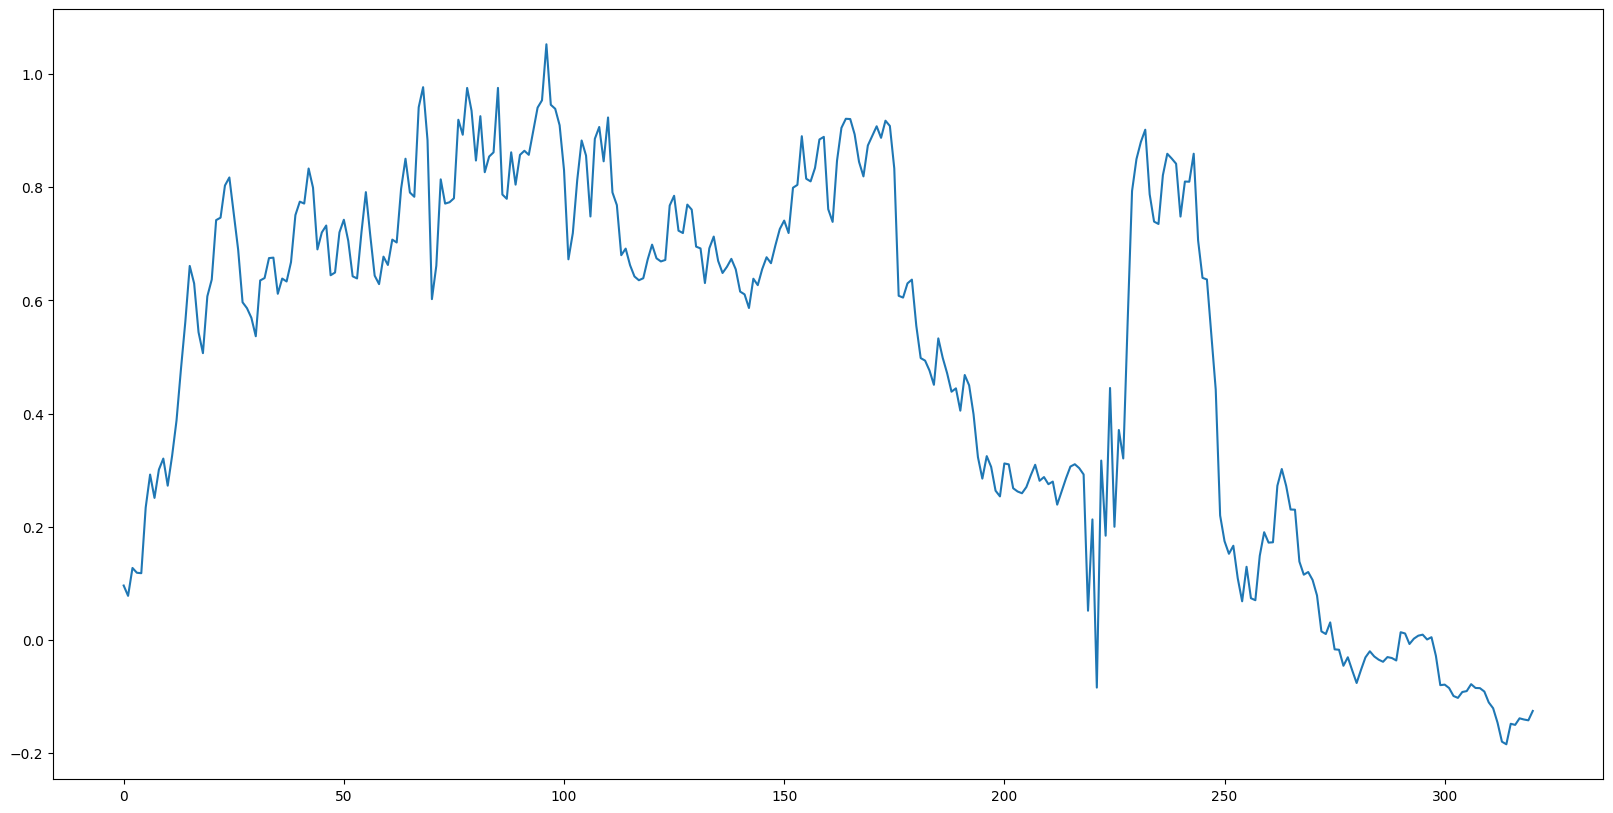

In [13]:
plt.figure(figsize=(20,10))
plt.plot(skewness)

In [14]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn.preprocessing import StandardScaler
df = pd.read_csv(r'C:\Users\ASUS\Documents\NARIT_internship_data\Output_HTML\Astropark\Astropark_Output.csv')

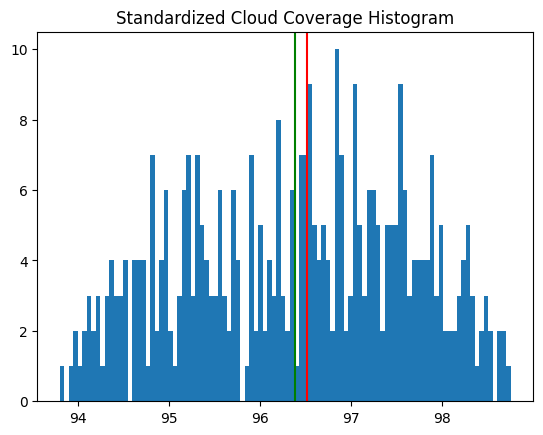

Mean :  Cloud_coverage %    96.387873
dtype: float64


c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [15]:
std = StandardScaler()
clarity = df[['Cloud_coverage %']]
x = np.array(std.fit_transform(clarity)).reshape(-1, 1)

# Plot histogram of the standardized data
plt.hist(x=np.array(clarity), bins=100)
plt.axvline(np.median(np.array(clarity)),c='r')
plt.axvline(np.mean(np.array(clarity)),c='g')
plt.title('Standardized Cloud Coverage Histogram')
plt.show()

print("Mean : ", np.mean(clarity))


In [16]:
df["Cloud_coverage %"].describe()

count    373.000000
mean      96.387873
std        1.236955
min       93.802802
25%       95.331114
50%       96.515842
75%       97.397938
max       98.750978
Name: Cloud_coverage %, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x2b507ae7250>,
 'caps': [<matplotlib.lines.Line2D at 0x2b507ae7790>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b507ae6fb0>],
 'medians': [<matplotlib.lines.Line2D at 0x2b507ae7cd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b507ae7f70>],
 'means': []}

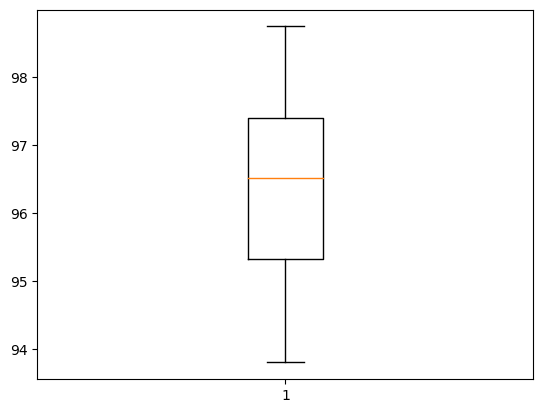

In [17]:
plt.boxplot(df['Cloud_coverage %'])

import pickle 

with open(r'C:\Users\ASUS\Documents\NARIT_internship_2024\NARIT_internship_2024\models\PCA\PCA_2.pkl','rb') as pca:
    PCA = pickle.load(pca)
with open(r'C:\Users\ASUS\Documents\NARIT_internship_2024\NARIT_internship_2024\models\Scaler\StandardScaler.pkl','rb') as scaler:
    Scaler = pickle.load(scaler)
with open(r'C:\Users\ASUS\Documents\NARIT_internship_2024\NARIT_internship_2024\models\kmean_model_2PCA.pkl','rb') as kmean:
    Kmean = pickle.load(kmean)

In [18]:
import pandas as pd
import numpy as np

output = pd.read_csv(r'C:\Users\ASUS\Documents\NARIT_internship_data\Output_HTML\Astropark\Astropark_Output.csv')

In [19]:
values = pd.value_counts(output['Kmean_clustering'])
print("Different classes : ",np.unique(output['Kmean_clustering']))
print("Each class count : ",values)
print("percentage for each class : ",values/len(output))

Different classes :  [2]
Each class count :  2    373
Name: Kmean_clustering, dtype: int64
percentage for each class :  2    1.0
Name: Kmean_clustering, dtype: float64


In [20]:
values = pd.value_counts(output['GMM_model'])
print("Different classes : ",np.unique(output['GMM_model']))
print("Each class count : ",values)
print("percentage for each class : ",values/len(output))

Different classes :  [1]
Each class count :  1    373
Name: GMM_model, dtype: int64
percentage for each class :  1    1.0
Name: GMM_model, dtype: float64


In [21]:
df1 = Builddataset().concateDataset(folder_name = r'C:\Users\ASUS\Documents\NARIT_internship_data\Categorical_large\GLCM_dis-1_ang-0')
df2 = Builddataset().concateDataset(folder_name = r'C:\Users\ASUS\Documents\NARIT_internship_data\Categorical_large\GLCM_dis-2_ang-0')
#df2 = Builddataset().concateDataset(folder_name = r'C:\Users\ASUS\Documents\NARIT_internship_data\Categorical\GLCM_2,0')
#df3 = Builddataset().concateDataset(folder_name = r'C:\Users\ASUS\Documents\NARIT_internship_data\Categorical\GLCM_3,0')
#df4 = Builddataset().concateDataset(folder_name = r'C:\Users\ASUS\Documents\NARIT_internship_data\Categorical\GLCM_4,0')
#df5 = Builddataset().concateDataset(folder_name = r'C:\Users\ASUS\Documents\NARIT_internship_data\Categorical\GLCM_1,45')
#df6 = Builddataset().concateDataset(folder_name = r'C:\Users\ASUS\Documents\NARIT_internship_data\Categorical\GLCM_2,45')
#df7 = Builddataset().concateDataset(folder_name = r'C:\Users\ASUS\Documents\NARIT_internship_data\Categorical\GLCM_3,45')
#df8 = Builddataset().concateDataset(folder_name = r'C:\Users\ASUS\Documents\NARIT_internship_data\Categorical\GLCM_4,45')
#df = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8])
df = pd.concat([df1,df2])

In [22]:
df 

,contrast,dissimilarity,homogeneity,energy,correlation,ASM,intensity,Red channel,Blue channel,skewness,std,different(R-B),label
638370042128363856,79.763306,1.216868,0.865810,0.759218,0.984903,0.576412,41.833756,15.873977,41.833756,-2.055100e-13,78.376212,-25.959780,Clear
638370046932058146,63.769081,0.926226,0.880399,0.758200,0.988338,0.574867,40.048208,15.878411,40.048208,1.917445e-13,76.281021,-24.169797,Clear
638370146480943313,86.983967,0.730657,0.927563,0.768745,0.978909,0.590969,39.948765,11.166211,39.948765,4.923171e-14,77.159021,-28.782554,Clear
638370192704663671,65.901830,0.762877,0.905894,0.759331,0.987869,0.576583,44.124871,15.357366,44.124871,1.067227e-13,82.468972,-28.767505,Clear
638370195105917690,66.398169,0.827492,0.894641,0.757846,0.986233,0.574330,40.235602,13.932176,40.235602,2.254294e-13,75.792271,-26.303426,Clear
...,...,...,...,...,...,...,...,...,...,...,...,...,...
638396160741143683,160.297466,1.504413,0.867777,0.757709,0.977426,0.574123,46.866081,22.479345,46.866081,1.276138e-13,85.768586,-24.386736,Partly Cloudy
638396161942145474,158.621897,1.354796,0.875254,0.760618,0.973605,0.578540,43.814820,18.208841,43.814820,1.392739e-14,81.657828,-25.605979,Partly Cloudy
638396163143045288,141.922205,1.206047,0.868995,0.756814,0.981570,0.572767,47.937862,25.189393,47.937862,-1.606508e-13,87.150613,-22.748469,Partly Cloudy
638396164343947701,143.454872,1.140568,0.877477,0.758794,0.980925,0.575768,46.914395,26.051714,46.914395,-1.387881e-13,85.788421,-20.862681,Partly Cloudy


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,classification_report
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.calibration import CalibratedClassifierCV
scaler = StandardScaler()
scaler.fit(df.drop(columns=['label']))
scaled = scaler.transform(df.drop(columns=['label']))
X = scaled
y = df['label']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=42)

In [24]:
X

array([[-0.58287645,  0.07378311, -0.48654506, ..., -1.41715065,
         0.35990112, -1.01058309],
       [-0.90128073, -0.45897522,  0.00416237, ...,  2.11477637,
         0.07960458, -0.82327413],
       [-0.43913148, -0.81746178,  1.59049031, ...,  0.84771735,
         0.19706418, -1.30596627],
       ...,
       [ 0.65454891,  0.05394796, -0.37939165, ..., -1.01831503,
         1.53374801, -0.67454238],
       [ 0.6850604 , -0.06607719, -0.09413331, ..., -0.82393666,
         1.35151275, -0.47720812],
       [ 0.79068932,  0.0448553 , -0.12939333, ...,  0.89379222,
         1.21713783, -0.48427959]])

In [25]:
#knn = KNeighborsClassifier(n_neighbors=5,weights='uniform',algorithm='auto',metric='minkowski',leaf_size=30)
from sklearn.ensemble import RandomForestClassifier

#knn = LogisticRegression(penalty='l2',solver='newton-cg',random_state=42)
knn = RandomForestClassifier(n_estimators=200,criterion='entropy')
knn.fit(X_train,y_train)
calibrated = CalibratedClassifierCV(estimator=knn,method='sigmoid')
calibrated.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print(knn.score(X_test,y_test))

0.9373235460191982


<Figure size 2000x2000 with 0 Axes>

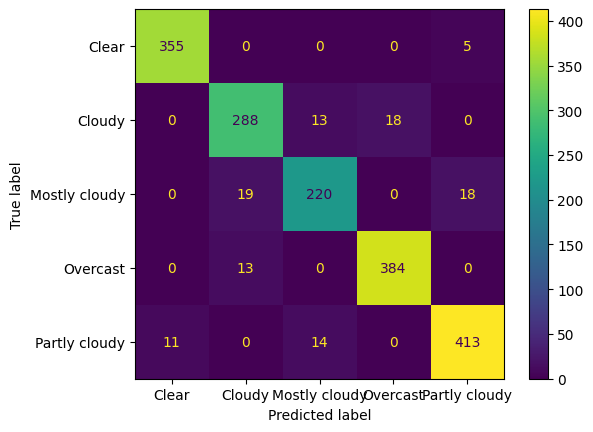

In [26]:
labels = ['Clear','Cloudy','Mostly cloudy','Overcast','Partly cloudy']
cm = confusion_matrix(y_test, y_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)
plt.figure(figsize=(20,20))
disp.plot(cmap=plt.cm.viridis)
plt.show()

In [27]:
print(classification_report(y_test,y_pred_knn))

               precision    recall  f1-score   support

        Clear       0.97      0.99      0.98       360
       Cloudy       0.90      0.90      0.90       319
Mostly Cloudy       0.89      0.86      0.87       257
     Overcast       0.96      0.97      0.96       397
Partly Cloudy       0.95      0.94      0.95       438

     accuracy                           0.94      1771
    macro avg       0.93      0.93      0.93      1771
 weighted avg       0.94      0.94      0.94      1771



from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn, X_train, y_train, cv=10)  # 5-fold cross-validation
print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())

In [28]:
filtering = lambda x : (x > sunrise) & (x < sunset)
#decimal = [timeConvertion().datetime_to_decimal(time=timeConvertion().ticks_to_datetime(ticks=t,time_zone=7)) for t in filename]
#day_indices = [index for index, value in enumerate(decimal) if filtering(value)]
#night_indices = [index for index, value in enumerate(decimal) if not filtering(value)]

In [33]:
from src.ClassPrediction import visualizer
from src.preprocessing import preprocessData

mask_path = r'C:\Users\ASUS\Documents\NARIT_internship_2024\NARIT_internship_2024\masks\International observatories\mask_Chile.png'
image_path = r'C:\Users\ASUS\Documents\NARIT_internship_data\All_sky_camera_Chile\2024-07\2024-07-10'
properties = ['contrast', 'dissimilarity', 'homogeneity', 'energy', 'correlation', 'ASM']
mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

images,filename = preprocessData().load_images_and_preprocess(image_path,mask=mask,apply_crop_sun=False)
filename = [int(i) for i in filename]
images = [cv2.resize(i,(1036,705)) for i in images]
#sunrise,sunset = SunPosition().SunriseSunset(filename=filename[50],location=[18.849417,98.9538],Time_zone=7,start_date=start_date,include_end_date=True)
masked,value,statistical = thresholding().RBratio(input=images,factor=[1.27,0.88],filename=filename,sunrise=sunrise,sunset=sunset,Time_zone=7)
value,statistical_1 = Builddataset().Statistical(input=images)
gray = [cv2.cvtColor(i,cv2.COLOR_RGB2GRAY) for i in images]
glcm = preprocessData().computeGlcm(image=gray,distance=[int(2)],angle=[int(0)])
test = preprocessData().getDataframe(properties,glcm,index=filename,intensity=value,statistical=statistical)
scaler_predict = scaler.transform(test)

prediction = knn.predict_proba(scaler_predict)
prediction = [list(map(lambda x: round(x, 4), prob)) for prob in prediction]
predict_frame = pd.DataFrame(data=None,index=filename)
time = [timeConvertion().ticks_to_datetime(i,time_zone=-4) for i in predict_frame.index]
predict_frame["Time"] = time
predict_frame["Prob %"] = [prediction[num] for num in range(len(prediction))]
predict_frame["Percent"] = [np.max(prediction[num]) for num in range(len(prediction))]
predict_frame['Label'] = knn.predict(scaler_predict)
predict_frame["Cloud_ratio"] = [preprocessData().showCloudRatio(masked,mask,num) for num,_ in enumerate(masked)]
images = [cv2.cvtColor(i,cv2.COLOR_RGB2BGR) for i in images]
images_64 = [visualizer().image_to_base64(i) for i in images]
predict_frame['Raw image'] = [visualizer().image_html(i, size=[200,200]) for i in images_64]

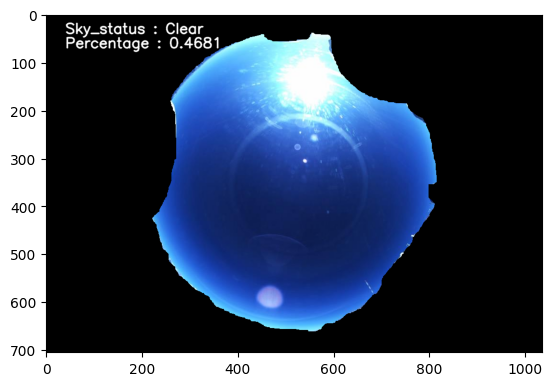

In [50]:
cv2.putText(images[45],
            "Sky_status : Clear",
            (40,40),
            cv2.FONT_HERSHEY_SIMPLEX,
            1,
            (255,255,255),
            2,
            cv2.LINE_AA)
cv2.putText(images[45],
            "Percentage : 0.4681",
            (40,70),
            cv2.FONT_HERSHEY_SIMPLEX,
            1,
            (255,255,255),
            2,
            cv2.LINE_AA)
plt.imshow(cv2.cvtColor(images[45],cv2.COLOR_BGR2RGB))

In [34]:
predict_frame.to_html("Test.html",escape=False)

In [35]:
Statistical = statistical
print(Statistical.shape)

(5, 514)


In [36]:
p
num = 180
plt.figure(figsize=(20,20))
#plt.subplot(1,2,1)
#plt.imshow(masked[num],cmap='gray')
#plt.subplot(1,2,2)
plt.imshow(images[num])

NameError: name 'p' is not defined

In [29]:
pd.value_counts(predict_frame['Label'])

Cloudy      451
Overcast     72
Name: Label, dtype: int64

In [30]:
#data tends to have some pattern recognition on clear (Not good) ----> add more data on clear with different pattern || solved###!
#Model a little bit overfitting

In [31]:
from src.preprocessing import thresholding
image = cv2.imread("C:\\Users\\ASUS\\Documents\\NARIT_internship_data\\All_sky_camera_Astropark_Chaingmai\\2024-08\\2024-08-06\\638584979539730949.png")
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

final,value,stats = thresholding().RBratio(input=[image],filename=[638584979539730949],factor=[1.0,1.0],Time_zone=7,sunrise=7.023,sunset=18.05)

In [32]:
print(stats[3])

[46.60379118]


In [33]:
import os,sys
import cv2
import numpy as np
import matplotlib.pyplot as plt
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..','..')))

from src.preprocessing import preprocessData
mask = cv2.imread(r'C:\Users\ASUS\Documents\NARIT_internship_2024\NARIT_internship_2024\masks\Domestic observatories\Mask_TNO.png',cv2.IMREAD_GRAYSCALE)
mask = (mask > 0).astype(np.uint8)
images,name = preprocessData().load_images_and_preprocess(path=r'C:\Users\ASUS\Documents\NARIT_internship_data\All_sky_camera_TNO\2024-09\2024-09-02',mask=mask,apply_crop_sun=False)

KeyboardInterrupt: 

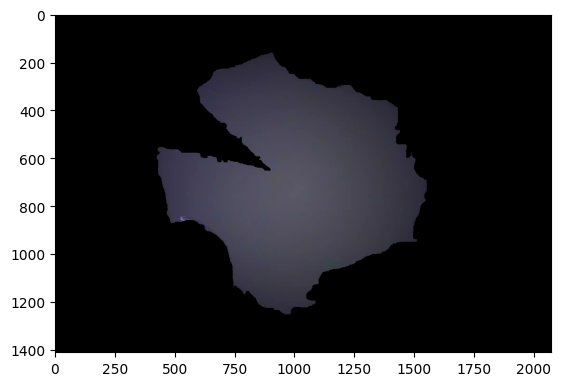

In [44]:
plt.imshow(images[380])

plt.imshow(masked[2])

from skl2onnx import to_onnx

onx = to_onnx(knn, X[:1])
with open("Astropark_night.onnx", "wb") as f:
    f.write(onx.SerializeToString())

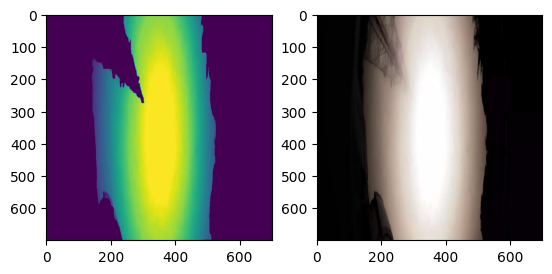

In [1]:
import cv2
import sys,os
import matplotlib.pyplot as plt
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..','..')))
from src.preprocessing import preprocessData
img = cv2.imread(r'C:\Users\ASUS\Documents\NARIT_internship_data\All_sky_camera_TNO\2024-09\2024-09-10\638615343765311542.png')
img = cv2.resize(img,(705,2000))
img = preprocessData().crop_center(img, crop_size=700)
B,G,R = cv2.split(img)
B = B + 1e-3
RB = cv2.convertScaleAbs(R/B)
img = cv2.bitwise_and(img,img,mask=RB)

mask = cv2.imread(r'C:\Users\ASUS\Documents\NARIT_internship_2024\NARIT_internship_2024\masks\Domestic observatories\Mask_TNO.png',cv2.IMREAD_GRAYSCALE)
mask = cv2.resize(mask,(705,2000))
mask = preprocessData().crop_center(mask, crop_size=700)

masked = cv2.bitwise_and(img,img,mask=mask)
masked = cv2.cvtColor(masked,cv2.COLOR_BGR2GRAY)
plt.subplot(1,2,1)
plt.imshow(masked)
plt.subplot(1,2,2)
plt.imshow(img)

cv2.countNonZero(masked)/cv2.countNonZero(mask)

print(mask.shape)
print(img.shape)
print(RB.shape)

In [3]:
import onnxruntime as rt
sess = rt.InferenceSession(r"C:\Users\ASUS\Documents\NARIT_internship_2024\NARIT_internship_2024\models\Classification_model\Astropark_night.onnx", providers=["CPUExecutionProvider"])
input_name = sess.get_inputs()[0].name
probability_name = sess.get_outputs()[0].name

run_options = rt.RunOptions()
run_options.log_severity_level = 0

pred_probabilities = sess.run([probability_name], {input_name: X_test.astype(np.float64)},run_options=run_options)[0]

NameError: name 'X_test' is not defined

In [1]:
import os,sys
path = r'C:\Users\ASUS\Documents\NARIT_internship_data\Dataset\Image_data_TNO\Image_data_Day\Mostly Cloudy\638370022317962879.png'
print(os.path.splitext(os.path.basename(path))[0])

638370022317962879


In [18]:
import cv2
import os
import sys
from skimage.feature import graycomatrix, graycoprops

# Append your library path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..','..')))

from src.ConstructDataset import Builddataset
from src.preprocessing import preprocessData

# Load the image
img = cv2.imread(r'C:\\Users\\ASUS\\Documents\\NARIT_internship_data\\Dataset\\image_data_Astropark\\image_data_Day\\Clear\\638545284152007058.png')
#masked = cv2.imread(r"C:\\Users\\ASUS\\Documents\\NARIT_internship_2024\\NARIT_internship_2024\\masks\\Domestic observatories\\mask_Astropark.png",cv2.IMREAD_GRAYSCALE)
img = cv2.bitwise_and(img,img,mask=masked)
# Convert to RGB and then to Grayscale
img = [cv2.cvtColor(img, cv2.COLOR_BGR2RGB)] 
_,stat = Builddataset().Statistical(input=img)
#img = [cv2.cvtColor(i, cv2.COLOR_RGB2GRAY) for i in img]

# GLCM calculation using skimage
glcm = graycomatrix(img[0], distances=[1], angles=[0], normed=False)

# Calculate Contrast and Energy
contrast = graycoprops(glcm, 'contrast')[0, 0]
dissimilarity = graycoprops(glcm, 'dissimilarity')[0, 0]
homogeneity = graycoprops(glcm, 'homogeneity')[0, 0]
correlation = graycoprops(glcm, 'correlation') [0, 0]
energy = graycoprops(glcm, 'energy')[0, 0]
ASM = graycoprops(glcm, 'ASM')[0, 0]  # Angular Second Moment (ASM)

# Output the results
print(f"Contrast: {contrast}")
print(f"Dissimilarity: {dissimilarity}")
print(f"Homogeneity: {homogeneity}")
print(f"Correlation {correlation}")
print(f"Energy: {energy}")
print(f"ASM: {ASM}")
print(stat)



ValueError: The parameter `image` must be a 2-dimensional array

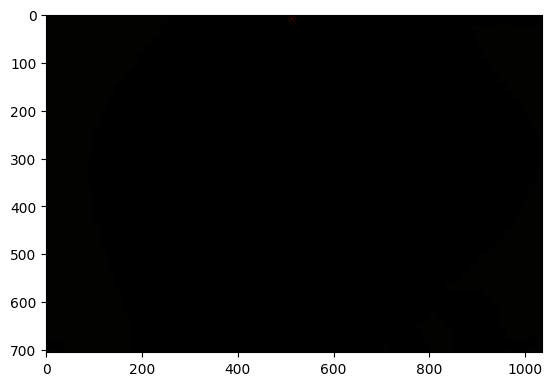

In [25]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
img = cv2.imread(r'C:\\Users\\ASUS\\Documents\\NARIT_internship_data\\Dataset\\image_data_Astropark\\image_data_Day\\Clear\\638545284152007058.png')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
R,_,B = cv2.split(img)
ratio = np.log1p(R / (B + 1e-5)) * 1.5
ratio = cv2.convertScaleAbs(ratio)
_, final_mask = cv2.threshold(ratio, 1, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
masked = cv2.bitwise_and(img,img,mask=final_mask)
plt.imshow(masked,cmap='gray')

onnx_acc = accuracy_score(pred_probabilities,y_test)
model_acc = accuracy_score(y_pred_knn,y_test)

percent_error = (np.abs(onnx_acc-model_acc)/model_acc) * 100
print(f"Different : {percent_error} %")

import os

img_dir = r'C:\Users\ASUS\Documents\NARIT_internship_data\Categorical'
df = list()
folders = os.listdir(img_dir)
for folder in folders:
    subfolder = os.path.join(img_dir,folder)
    df.append(Builddataset().concateDataset(folder_name=subfolder))
dataframe = pd.concat(df)